In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
import urllib

In [4]:
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt', 'stations.txt')

('stations.txt', <email.message.Message at 0x7fa4922ffc70>)

In [6]:
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/', 'apr20.txt')

('apr20.txt', <email.message.Message at 0x7fa480f0b370>)

The above FTP file shows what the downloadable FTP extensions are. It's where you can see that ghcnd-stations.txt is a file that can be downloaded.

In [10]:
with open('stations.txt', 'r') as f:
    for i in range(10):
        line = f.readline()
        print(line)

ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       

ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    

AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196

AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194

AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217

AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218

AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930

AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938

AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948

AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990



We are only interested in the GSN stations.

In [11]:
stations = {}
for line in open('stations.txt', 'r'):
    if 'GSN' in line:
        fields = line.split()
        stations[fields[0]] = ' '.join(fields[4:])

In [13]:
list(stations.items())[:5]

[('AE000041196', 'SHARJAH INTER. AIRP GSN 41196'),
 ('AF000040930', 'NORTH-SALANG GSN 40930'),
 ('AG000060390', 'ALGER-DAR EL BEIDA GSN 60390'),
 ('AG000060590', 'EL-GOLEA GSN 60590'),
 ('AG000060611', 'IN-AMENAS GSN 60611')]

In [14]:
len(stations)

994

We want to narrow down the number of stations a little bit.

In [15]:
def findstations(s):
    found = {code: name for code, name in stations.items() if s in name}
    print(found)

In [16]:
findstations('LIHUE')

{'USW00022536': 'HI LIHUE WSO AP 1020.1 GSN 91165'}


In [17]:
findstations('SAN DIEGO')

{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}


In [18]:
findstations('MINNEAPOLIS')

{'USW00014922': 'MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658'}


In [19]:
findstations('IRKUTSK')

{'RSM00030710': 'IRKUTSK GSN 30710'}


These 4 stations are interesting. There is one on Kauai, one in San Diego, one in Minneapolis, and one in Irkutsk, Siberia.

In [20]:
datastations = ['USW00022536', 'USW00023188', 'USW00014922', 'RSM00030710']

I will now download, via FTP, all of the station data in .dly format. Instructions for this are found at ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt.

In [23]:
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/all/USW00022536.dly', 'lihue.dly')

('lihue.dly', <email.message.Message at 0x7fa492cc5610>)

In [24]:
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/all/USW00023188.dly', 'sandiego.dly')

('sandiego.dly', <email.message.Message at 0x7fa492cc57c0>)

In [25]:
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/all/USW00014922.dly', 'minneapolis.dly')

('minneapolis.dly', <email.message.Message at 0x7fa492cc58e0>)

In [ ]:
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/all/RSM00030710.dly', 'siberia.dly')

The format for the .dly is described in the readme.txt in section III.

In [28]:
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt', 'readme.txt')

('readme.txt', <email.message.Message at 0x7fa492cc5be0>)

In [29]:
with open('lihue.dly') as f:
    for i in range(10):
        line = f.readline()
        print(line)

USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   

USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999   

USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999   

USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0 

In [41]:
with open('readme.txt', 'r') as f:
    lines = f.readlines()[98:132]
    print(''.join(lines).strip())

III. FORMAT OF DATA FILES (".dly" FILES)

Each ".dly" file contains data for one station.  The name of the file
corresponds to a station's identification code.  For example, "USC00026481.dly"
contains the data for the station with the identification code USC00026481).

Each record in a file contains one month of daily data.  The variables on each
line include the following:

------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
YEAR         12-15   Integer
MONTH        16-17   Integer
ELEMENT      18-21   Character
VALUE1       22-26   Integer
MFLAG1       27-27   Character
QFLAG1       28-28   Character
SFLAG1       29-29   Character
VALUE2       30-34   Integer
MFLAG2       35-35   Character
QFLAG2       36-36   Character
SFLAG2       37-37   Character
  .           .          .
  .           .          .
  .           .          .
VALUE31    262-266   Integer
MFLAG31    267-267   Character
QFLAG31    268-268   Characte

In [42]:
def parsefile(filename):
    return np.genfromtxt(filename,
                        delimiter = dly_delimiter,
                        usecols = dly_usecols,
                        dtype = dly_dtype,
                        names = dly_names)

In [44]:
# Create delimiter by looking at the data structure in the readme
dly_delimiter = [11, 4, 2, 4] + [5, 1, 1, 1] * 31
dly_usecols = [1, 2, 3] + [4*i for i in range(1, 32)] # using only value and skipping the flags
dly_dtype = [np.int32, np.int32, (np.str_,4)] + [np.int32] * 31
dly_names = ['year', 'month', 'obs'] + [str(day) for day in range(1, 31+1)]

In [45]:
lihue = parsefile('lihue.dly')

In [46]:
lihue

array([(1950, 2, 'TMAX',   256,   256,   256, 267,   217,   228,   256,   272,   256,   256,   256,   244,   256,   256,   244,   244,   250,   256,   239,   250,   256,   256,   267,   261,   267,   267,   261,   261, -9999, -9999, -9999),
       (1950, 2, 'TMIN',   178,   156,   161, 167,   167,   167,   189,   211,   206,   217,   217,   211,   200,   200,   206,   183,   206,   206,   206,   194,   206,   200,   206,   200,   211,   183,   172,   200, -9999, -9999, -9999),
       (1950, 2, 'PRCP',     0,     0,     0,   0,   737,   406,    36,    38,     0,     0,     0,     0,    18,     5,    10,    18,    15,     5,     0,     0,    23,    10,     3,    48,     0,     0,     0,     5, -9999, -9999, -9999),
       ...,
       (2020, 4, 'WSF5',   134,    89, -9999, 107,    89,   112,   116,    81,    67,   103,   112,   112, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2020, 4, 'WT01',

The format of this data needs to be massaged a little. It's a rather complicated record array, with the temperature for each day of the month in one row. 

In [54]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'], record['month']))
    dates = np.arange(startdate, startdate + np.timedelta64(1, 'M'), np.timedelta64(1, 'D'))
    
    rows = [(date, record[str(i+1)]/10) for i, date in enumerate(dates)]
    return rows

In [55]:
unroll(lihue[0])

[(numpy.datetime64('1950-02-01'), 25.6),
 (numpy.datetime64('1950-02-02'), 25.6),
 (numpy.datetime64('1950-02-03'), 25.6),
 (numpy.datetime64('1950-02-04'), 26.7),
 (numpy.datetime64('1950-02-05'), 21.7),
 (numpy.datetime64('1950-02-06'), 22.8),
 (numpy.datetime64('1950-02-07'), 25.6),
 (numpy.datetime64('1950-02-08'), 27.2),
 (numpy.datetime64('1950-02-09'), 25.6),
 (numpy.datetime64('1950-02-10'), 25.6),
 (numpy.datetime64('1950-02-11'), 25.6),
 (numpy.datetime64('1950-02-12'), 24.4),
 (numpy.datetime64('1950-02-13'), 25.6),
 (numpy.datetime64('1950-02-14'), 25.6),
 (numpy.datetime64('1950-02-15'), 24.4),
 (numpy.datetime64('1950-02-16'), 24.4),
 (numpy.datetime64('1950-02-17'), 25.0),
 (numpy.datetime64('1950-02-18'), 25.6),
 (numpy.datetime64('1950-02-19'), 23.9),
 (numpy.datetime64('1950-02-20'), 25.0),
 (numpy.datetime64('1950-02-21'), 25.6),
 (numpy.datetime64('1950-02-22'), 25.6),
 (numpy.datetime64('1950-02-23'), 26.7),
 (numpy.datetime64('1950-02-24'), 26.1),
 (numpy.datetime

In [63]:
lihue[0]['1']

256

The temperature data is given in tenths of degrees so the temperature needs to be divided by 10. Also, recall that the column names for the days, which start after ['year', 'month', 'obs'] are strings, which is why the _record_ argument that is passed to unroll is indexed by a string representation of the integer.

Instead of a list of tuples, we would prefer that the function return a numpy record array.

In [65]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'], record['month']))
    dates = np.arange(startdate, startdate + np.timedelta64(1, 'M'), np.timedelta64(1, 'D'))
    
    rows = [(date, record[str(i+1)]/10) for i, date in enumerate(dates)]
    return np.array(rows, dtype=[('date', 'M8[D]'), ('value', 'd')])

In [66]:
unroll(lihue[0])

array([('1950-02-01', 25.6), ('1950-02-02', 25.6), ('1950-02-03', 25.6),
       ('1950-02-04', 26.7), ('1950-02-05', 21.7), ('1950-02-06', 22.8),
       ('1950-02-07', 25.6), ('1950-02-08', 27.2), ('1950-02-09', 25.6),
       ('1950-02-10', 25.6), ('1950-02-11', 25.6), ('1950-02-12', 24.4),
       ('1950-02-13', 25.6), ('1950-02-14', 25.6), ('1950-02-15', 24.4),
       ('1950-02-16', 24.4), ('1950-02-17', 25. ), ('1950-02-18', 25.6),
       ('1950-02-19', 23.9), ('1950-02-20', 25. ), ('1950-02-21', 25.6),
       ('1950-02-22', 25.6), ('1950-02-23', 26.7), ('1950-02-24', 26.1),
       ('1950-02-25', 26.7), ('1950-02-26', 26.7), ('1950-02-27', 26.1),
       ('1950-02-28', 26.1)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [83]:
def getobs(filename, obs):
    return np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])

In [88]:
test = getobs('lihue.dly', 'TMIN')
test[:31]

array([('1950-02-01', 17.8), ('1950-02-02', 15.6), ('1950-02-03', 16.1),
       ('1950-02-04', 16.7), ('1950-02-05', 16.7), ('1950-02-06', 16.7),
       ('1950-02-07', 18.9), ('1950-02-08', 21.1), ('1950-02-09', 20.6),
       ('1950-02-10', 21.7), ('1950-02-11', 21.7), ('1950-02-12', 21.1),
       ('1950-02-13', 20. ), ('1950-02-14', 20. ), ('1950-02-15', 20.6),
       ('1950-02-16', 18.3), ('1950-02-17', 20.6), ('1950-02-18', 20.6),
       ('1950-02-19', 20.6), ('1950-02-20', 19.4), ('1950-02-21', 20.6),
       ('1950-02-22', 20. ), ('1950-02-23', 20.6), ('1950-02-24', 20. ),
       ('1950-02-25', 21.1), ('1950-02-26', 18.3), ('1950-02-27', 17.2),
       ('1950-02-28', 20. ), ('1950-03-01', 21.1), ('1950-03-02', 17.2),
       ('1950-03-03', 14.4)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

# Dealing with Missing Data

In [89]:
lihue_max = getobs('lihue.dly', 'TMAX')
lihue_min = getobs('lihue.dly', 'TMIN')

In [91]:
lihue_max['value'].dtype

dtype('float64')

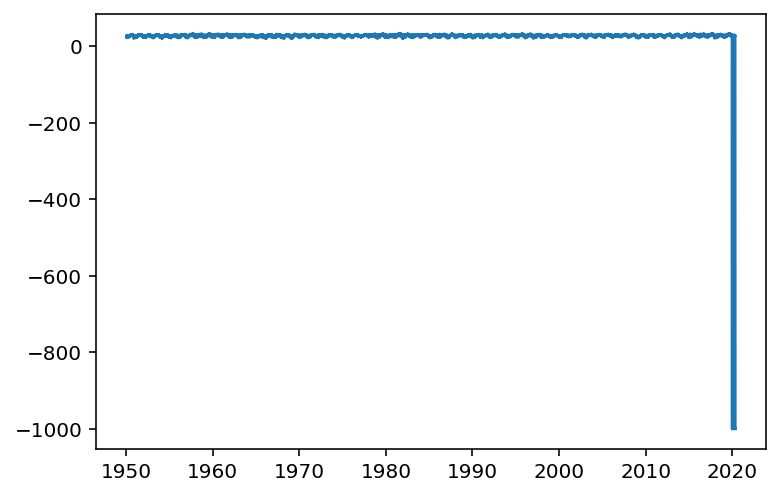

In [92]:
plt.plot(lihue_max['date'], lihue_max['value'])

There are strange values in the dataset.

In [93]:
lihue_max[lihue_max['value'] < -200]

array([('2019-12-25', -999.9), ('2019-12-26', -999.9),
       ('2020-01-12', -999.9), ('2020-01-13', -999.9),
       ('2020-03-11', -999.9), ('2020-04-18', -999.9),
       ('2020-04-19', -999.9), ('2020-04-20', -999.9),
       ('2020-04-21', -999.9), ('2020-04-22', -999.9),
       ('2020-04-23', -999.9), ('2020-04-24', -999.9),
       ('2020-04-25', -999.9), ('2020-04-26', -999.9),
       ('2020-04-27', -999.9), ('2020-04-28', -999.9),
       ('2020-04-29', -999.9), ('2020-04-30', -999.9)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

There are -999.9 values present, which are intended to represent missing values. Let's convert these to nan.

In [94]:
def getobs(filename, obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [95]:
lihue_max = getobs('lihue.dly', 'TMAX')
lihue_min = getobs('lihue.dly', 'TMIN')

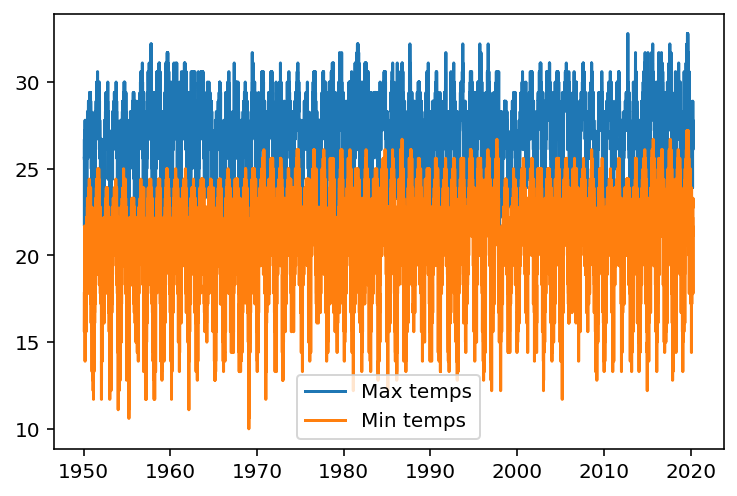

In [97]:
plt.plot(lihue_max['date'], lihue_max['value'], label='Max temps')
plt.plot(lihue_min['date'], lihue_min['value'], label='Min temps')
plt.legend()

The problem with replacing missing values with nan is it prevents descriptive statistics from being run, because operations involving nan values return nan values.

In [98]:
lihue_max['value'].mean()

nan

A better way is to interpolate with the neighboring values.

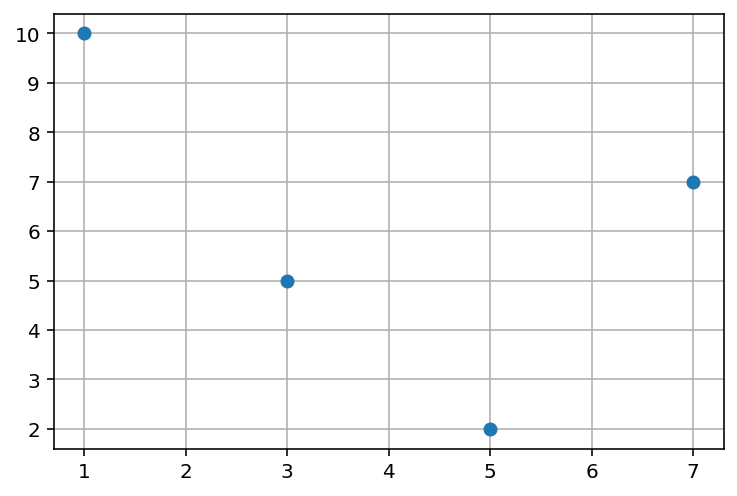

In [107]:
xs = np.linspace(1, 7)
x = np.array([1, 3, 5, 7], 'd')
y = np.array([10, 5, 2, 7], 'd')
plt.plot(x, y, 'o')
plt.grid(True)

In [108]:
ys = np.interp(xs, x, y)

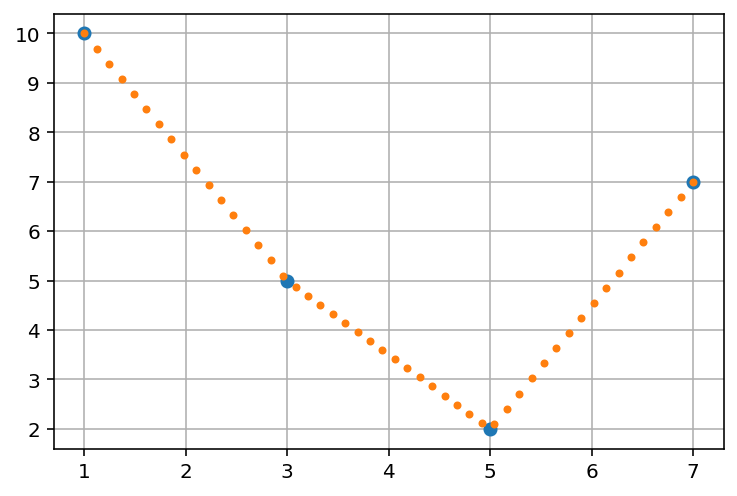

In [109]:
plt.plot(x, y, 'o')
plt.plot(xs, ys, '.')
plt.grid(True)

In [110]:
def fillnans(data):
    date_float = data['date'].astype(np.float32)
    nan = np.isnan(data['value'])
    data['value'][nan] = np.interp(date_float[nan], date_float[~nan], data['value'][~nan])

In [114]:
fillnans(lihue_max)
fillnans(lihue_min)

In [116]:
lihue_max['value'].mean()

27.336849592703746

In [117]:
lihue_min['value'].mean()

21.09143118836965